In [7]:
import numpy as np

import keras
from keras.layers import *
from keras.models import *

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train[0])

11493376/11490434 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

In [8]:
x_train = x_train / 256.0

In [10]:
x_train = x_train.reshape((-1, 28,28,1))
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
input_shape = (28,28,1)

In [33]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3),  activation="selu" , padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="selu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="selu"),
        keras.layers.Dense(3136),
        keras.layers.Reshape((7,7,64)),
        keras.layers.Conv2DTranspose(64, 2, 2, padding='same'),
        keras.layers.Conv2DTranspose(32, 2, 2, padding='same'),
        keras.layers.Conv2DTranspose(1, 2, 2, padding='same'),
        keras.layers.Conv2D(1,3, 2, activation="sigmoid", padding='same'),
    ] 
)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               803072    
_________________________________________________________________
dense_25 (Dense)             (None, 3136)            

In [35]:
model.fit(x_train,x_train, epochs=5, validation_split=0.2, batch_size=256)

Epoch 1/50
188/188 [==============================] - 98s 517ms/step - loss: 0.1040 - val_loss: 0.0905
Epoch 2/50
  7/188 [>.............................] - ETA: 1:27 - loss: 0.0892

KeyboardInterrupt: ignored

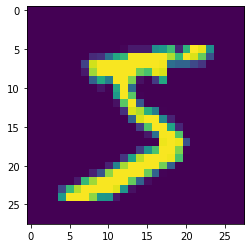

In [36]:
import matplotlib.pyplot as plt
def display(img):
  img = img.reshape((28,28))
  img = img * 256
  plt.imshow(img)
  plt.show()

display(x_train[0])

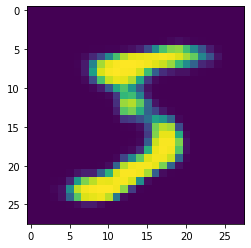

In [37]:
y = model.predict(x_train[:5])
display(y[0])

In [38]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               803072    
_________________________________________________________________
dense_25 (Dense)             (None, 3136)            

In [43]:
enc_input = model.layers[0].input
enc_output = model.layers[5].output
enc = keras.models.Model(enc_input,enc_output)
enc.summary()
enc.save('encoder.h5')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               8030

In [47]:
dec = Sequential([keras.layers.Input(shape=(256,))] + model.layers[6:])
dec.summary()
dec.save('decoder.h5')

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 3136)              805952    
_________________________________________________________________
reshape_9 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 14, 14, 64)        16448     
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 28, 28, 32)        8224      
_________________________________________________________________
conv2d_transpose_29 (Conv2DT (None, 56, 56, 1)         129       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 1)         10        
Total params: 830,763
Trainable params: 830,763
Non-trainable params: 0
_______________________________________________

(5, 28, 28, 1)
(5, 256)
(5, 28, 28, 1)


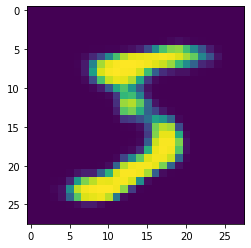

In [49]:
samples = x_train[0:5]

print(samples.shape)
enc_x = enc.predict(samples)
print(enc_x.shape)

dec_x = dec.predict(enc_x)
print(dec_x.shape)

display(dec_x[0])